### Module 4 Cleaning data with pandas
### In-class exercises Answers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Q.1 (a)
ser1 = pd.Series([0.25,0.5,0.75,1.0], index=["a","b","c","d"])
ser1

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [3]:
# 1. (b)
# use loc for explicit index
# use iloc for implicit index
print (ser1.loc[["b","c"]])  # pay attention to the [] inside the []
print ()
print (ser1.iloc[[1,3]])

b    0.50
c    0.75
dtype: float64

b    0.5
d    1.0
dtype: float64


In [5]:
#1(c)
ser1.rename(index={"a":"i","b":"ii","c":"iii","d":"iv"}, inplace=True) 
# inplace = True to replace the original series
ser1

i      0.25
ii     0.50
iii    0.75
iv     1.00
dtype: float64

In [6]:
#1(d)
ser1.sort_values(ascending=False)

iv     1.00
iii    0.75
ii     0.50
i      0.25
dtype: float64

In [8]:
# Q.2 (a)
pop = {"California":38332521, "Texas":26448193, "New York":19651127, "Florida":19552860, "Illinois":12882135}
area = {"California":423967, "Texas":695662, "New York":141297, "Florida":170312, "Illinois":14995}
df = pd.DataFrame({"state population":pop,"state area":area})
df.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [9]:
# 2b
df[df["state population"]<20000000] 

,state population,state area
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,14995


In [10]:
# 2c
df["state density"] = df["state population"] / df["state area"]
df

,state population,state area,state density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,14995,859.095365


In [12]:
#2d
df.loc["California"]["state area"]      # to access a given row with an explicit index, use loc

423967.0

In [13]:
#2e
df = df[["state area","state population","state density"]]
df

,state area,state population,state density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,14995,12882135,859.095365


In [14]:
#2f
df.iloc[-2:]        # iloc for implicit index of rows

,state area,state population,state density
Florida,170312,19552860,114.806121
Illinois,14995,12882135,859.095365


In [15]:
#Q3
df = pd.DataFrame([[1,      np.nan, 2, np.nan],
                   [2,      3,      5, 3.5],
                   [np.nan, 4,      6, np.nan]])
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,3.5
2,NaN,4.0,6,NaN


In [16]:
#3a
df.columns=["i","ii","iii","iv"]
df.index=["a","b","c"]
df

,i,ii,iii,iv
a,1.0,NaN,2,NaN
b,2.0,3.0,5,3.5
c,NaN,4.0,6,NaN


In [17]:
#3b
df.dropna()

,i,ii,iii,iv
b,2.0,3.0,5,3.5


In [18]:
#3c
df.dropna(axis=1)        # axis = 1 is for columns

,iii
a,2
b,5
c,6


In [19]:
#3d
df.dropna(axis=1, how="all")   # you have to put "" around the word all

,i,ii,iii,iv
a,1.0,NaN,2,NaN
b,2.0,3.0,5,3.5
c,NaN,4.0,6,NaN


In [21]:
#3e
df.fillna(0)   

,i,ii,iii,iv
a,1.0,0.0,2,0.0
b,2.0,3.0,5,3.5
c,0.0,4.0,6,0.0


In [22]:
#3f
df_new = df.copy()      # don't use df_new = df  Any changes in df_new will also affect df
for column in df_new.columns:
    df_new[column] = df_new[column].fillna(df_new[column].mean())
print(df)
print()
print(df_new)

     i   ii  iii   iv
a  1.0  NaN    2  NaN
b  2.0  3.0    5  3.5
c  NaN  4.0    6  NaN

     i   ii  iii   iv
a  1.0  3.5    2  3.5
b  2.0  3.0    5  3.5
c  1.5  4.0    6  3.5


In [23]:
# Q.4
df5 = pd.DataFrame(np.random.randint(0,11,size=(2,3)),columns=["A","B","C"], index=[1,2])
df6 = pd.DataFrame(np.random.randint(0,11,size=(2,3)),columns=["D","B","C"], index=[1,2])
print(df5)
print(df6)

   A  B   C
1  7  6  10
2  9  7   3
   D  B  C
1  9  0  4
2  5  3  6


In [25]:
df_new = df5.append(df6)
df_new

,A,B,C,D
1,7.0,6,10,NaN
2,9.0,7,3,NaN
1,NaN,0,4,9.0
2,NaN,3,6,5.0


In [26]:
#Q.5

df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df3 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df4 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})

# merge df1 with df2, the key is "employee"
df_merged1 =df1.merge(df2, on="employee")     # on = "merge_key"
df_merged1

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [27]:
# merge df_merged1 with df3, the key is "group"
df_merged2 =df_merged1.merge(df3, on="group")     # on = "merge_key"
df_merged2

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [28]:
# merge df_merged2 with df4, the key for df_merged2 = "employee", the key for df4 = "name"
df_final =df_merged2.merge(df4, left_on="employee", right_on="name")     
del(df_final["name"])        # the columns employee and name are duplicates
df_final

,employee,group,hire_date,supervisor,salary
0,Bob,Accounting,2008,Carly,70000
1,Jake,Engineering,2012,Guido,80000
2,Lisa,Engineering,2004,Guido,120000
3,Sue,HR,2014,Steve,90000


In [29]:
# Q.6
# import the datasets
pop = pd.read_csv("state-population.csv")
area = pd.read_csv("state-areas.csv")
abbre = pd.read_csv("state-abbrevs.csv")

In [30]:
# show the first few rows of each dataset
print(pop.head())
print()
print(area.head())
print()
print(abbre.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [31]:
# first merge the df pop with the df abbre
df_merged1 = pop.merge(abbre, how="outer",left_on="state/region", right_on="abbreviation")
# how="outer" will retain the rows in "pop" with key which do not match with "abbre"
# how = "inner" will only keep the rows in "pop" with key matching with "abbre"
del(df_merged1["abbreviation"])
df_merged1

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN
2540,USA,under18,2011,73902222.0,NaN
2541,USA,total,2011,311582564.0,NaN
2542,USA,under18,2012,73708179.0,NaN


In [33]:
# check any missing values before additional merge
# as we use how="outer", it is likely that we have some rows not matched and hence some missing values
df_merged1.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [34]:
# let's check the rows with missing population values
df_merged1[df_merged1["population"].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [35]:
df_merged1.loc[df_merged1['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [36]:
# so "PR" and "USA" have missing values.
df_merged1.loc[df_merged1['state/region'] == 'PR', 'state'] = 'Puerto Rico'
df_merged1.loc[df_merged1['state/region'] == 'USA', 'state'] = 'United States'
df_merged1.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [37]:
# then merge with the df area
df_final = df_merged1.merge(area, how="left", on="state")
df_final

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,United States,NaN
2540,USA,under18,2011,73902222.0,United States,NaN
2541,USA,total,2011,311582564.0,United States,NaN
2542,USA,under18,2012,73708179.0,United States,NaN


In [38]:
df_final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [39]:
df_final['state'][df_final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [40]:
#6b we can drop the missing values
df_final.dropna(inplace=True)
df_final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [41]:
#6c We just extract the rows for year ==2010 and ages == total
df_new = df_final[(df_final["ages"]=="total") & (df_final["year"]==2010)]
df_new.set_index("state", inplace = True)
density = df_new["population"] /df_new["area (sq. mi)"]
density.head()

state
Alabama        91.287603
Alaska          1.087509
Arizona        56.214497
Arkansas       54.948667
California    228.051342
dtype: float64

In [42]:
# 6d
density.sort_values(ascending = False)

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
Massachusetts            621.815538
Maryland                 466.445797
Delaware                 460.445752
New York                 356.094135
Florida                  286.597129
Pennsylvania             275.966651
Ohio                     257.549634
California               228.051342
Illinois                 221.687472
Virginia                 187.622273
Indiana                  178.197831
North Carolina           177.617157
Georgia                  163.409902
Tennessee                150.825298
South Carolina           144.854594
New Hampshire            140.799273
Hawaii                   124.746707
Kentucky                 107.586994
Michigan                 102.015794
Washington                94.557817
Texas                     93.987655
Alabama                   91.287603
Louisiana             

In [43]:
# Q.7 (a)
import seaborn as sns
planets = sns.load_dataset('planets')
planets.head(10)         # this will display the first 10 rows of the dataframe.

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [44]:
# 7b
planets.groupby("method")["orbital_period"].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [45]:
#7c
# find the oldest year and the most recent year of discovery.
print (planets["year"].max())  
print (planets["year"].min())

2014
1989


In [46]:
# the decades should be from 1980s to 2010s
planets["decade"] = planets["year"]//10 * 10
planets["decade"] = planets["decade"].astype(str) + "s"
planets.head()

,method,number,orbital_period,mass,distance,year,decade
0,Radial Velocity,1,269.300,7.10,77.40,2006,2000s
1,Radial Velocity,1,874.774,2.21,56.95,2008,2000s
2,Radial Velocity,1,763.000,2.60,19.84,2011,2010s
3,Radial Velocity,1,326.030,19.40,110.62,2007,2000s
4,Radial Velocity,1,516.220,10.50,119.47,2009,2000s


In [47]:
planets.groupby(["method","decade"])["number"].sum().unstack().fillna(0)
# without unstack(), it will return a series.
# wit unstack(), it will return a dataframe.

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [48]:
#Q.8
data = np.random.randint(1,100,size=100).reshape(25,4)
df = pd.DataFrame(data, columns=["W","X","Y","Z"])
df.head()

,W,X,Y,Z
0,78,94,66,48
1,73,53,86,43
2,94,67,36,15
3,42,75,40,59
4,78,96,68,5


In [49]:
df.tail(5)

,W,X,Y,Z
20,94,28,46,9
21,60,49,35,28
22,84,88,90,89
23,42,24,45,63
24,67,24,59,36


In [50]:
#8b
df[["X","Z"]].head()

,X,Z
0,94,48
1,53,43
2,67,15
3,75,59
4,96,5


In [51]:
df["W"].value_counts()

78    2
72    2
42    2
94    2
63    1
65    1
98    1
67    1
6     1
91    1
73    1
49    1
82    1
51    1
52    1
62    1
56    1
57    1
59    1
60    1
84    1
Name: W, dtype: int64

In [52]:
df[df["Y"]>50]

,W,X,Y,Z
0,78,94,66,48
1,73,53,86,43
4,78,96,68,5
7,56,33,74,17
8,98,80,75,49
12,59,54,77,6
14,6,50,68,99
16,51,99,78,89
18,62,98,82,6
19,91,79,97,69


In [53]:
#8e
df.loc[df["Z"]<30,"Y"]=30      # use loc to find rows with df["Z"]<30
df

,W,X,Y,Z
0,78,94,66,48
1,73,53,86,43
2,94,67,30,15
3,42,75,40,59
4,78,96,30,5
5,57,84,30,22
6,52,34,35,35
7,56,33,30,17
8,98,80,75,49
9,72,26,1,40


In [54]:
#8f
df["A"]=df["X"]*df["Z"]
df.head()

,W,X,Y,Z,A
0,78,94,66,48,4512
1,73,53,86,43,2279
2,94,67,30,15,1005
3,42,75,40,59,4425
4,78,96,30,5,480


In [55]:
#8g
df.drop(df[df["Z"]<20].index)       
#df[df["Z"]<20] is a dataframe
# we use df[df["Z"]<20].index to find the index of the rows and then drop them.

,W,X,Y,Z,A
0,78,94,66,48,4512
1,73,53,86,43,2279
3,42,75,40,59,4425
5,57,84,30,22,1848
6,52,34,35,35,1190
8,98,80,75,49,3920
9,72,26,1,40,1040
10,82,53,1,96,5088
11,65,36,6,52,1872
13,63,94,30,21,1974


In [56]:
# Q.9 (a)
df = pd.read_csv("Boston_Housing.csv")
df.head(10)      

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9


In [57]:
#9b
df_small =df.drop(["CHAS", "NOX", "RAD", "LSTAT"], axis=1) # don't forget axis=1
df_small.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,TAX,PTRATIO,PRICE
0,0.00632,18.0,2.31,6.575,65.2,4.0900,296,15.3,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,242,17.8,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,242,17.8,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,222,18.7,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,222,18.7,36.2


In [58]:
#9c
print("mean number of rooms per dwelling = ", round(df_small["RM"].mean(),1))
print("median age of houses = ", round(df_small["AGE"].median(),1))            # use round to remove decimals.
print("mean distances = ", "{:.3}".format(df_small["DIS"].median()))           # use "{:}.format()" to express the number in an appropriate format 
print("percentage of houses with a price less than $20,000 =", "{:.2%}".format(sum(df_small["PRICE"]<20)/len(df_small)))  # first sum the number of houses less than $20K, then divide the sum by the number of rows.

mean number of rooms per dwelling =  6.3
median age of houses =  77.5
mean distances =  3.21
percentage of houses with a price less than $20,000 = 41.50%


In [59]:
# Q.10(a)
data_visit = pd.read_csv("visit_data.csv")
data_visit.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'ip_address',
       'visit'],
      dtype='object')

In [60]:
#10b find entries with the same first name and last name.
data_visit[data_visit.duplicated(["first_name","last_name"])][["first_name","last_name"]]
# duplicate last name and first name are missing, it should not be a problem.

,first_name,last_name
4,NaN,NaN
7,NaN,NaN
11,NaN,NaN
13,NaN,NaN
15,NaN,NaN
...,...,...
981,NaN,NaN
993,NaN,NaN
994,NaN,NaN
997,NaN,NaN


In [61]:
#10c find entries with the same email
data_visit[data_visit.duplicated(["email"])]["email"]
# there are no duplicate entries of emails.

Series([], Name: email, dtype: object)

In [62]:
#10d check missing values for visit
print ("number of missing entries for visit =", data_visit["visit"].isnull().sum())

number of missing entries for visit = 26


In [63]:
# 10e      don't use df_new = data_visit, this will also change the original when we change the copy
df_new =data_visit.copy()

In [64]:
# 10f drop rows for any null vaule in the column "visit"
df_new.dropna(axis=0, subset=["visit"])

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [65]:
#10f how many rows dropped
a = len(df_new)
b = len (df_new.dropna(axis=0, subset=["visit"]))
print("the number of rows dropped = ", a - b)

the number of rows dropped =  26


In [66]:
#10g instead of dropping, we can keep the entries with visit between 100 and 2900
df1 = df_new[(df_new['visit'] <= 2900) & (df_new['visit'] >= 100)]

In [67]:
# Q.11
olympics = pd.read_csv("olympics.csv", index_col=0, skiprows=1)
#1. we use the column ountry as index
#2. the first row of the dataframe is useless. So, we skip it.
olympics.head()

,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [68]:
olympics.columns

Index(['№ Summer', '01 !', '02 !', '03 !', 'Total', '№ Winter', '01 !.1',
       '02 !.1', '03 !.1', 'Total.1', '№ Games', '01 !.2', '02 !.2', '03 !.2',
       'Combined total'],
      dtype='object')

In [69]:
# we need to do some wrangling for column names and the index.
for col in olympics.columns:
    if col[:2]=='01':                    # check if first two characters of the column name is "01"  
        olympics.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        olympics.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        olympics.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        olympics.rename(columns={col:'#'+col[1:]}, inplace=True)
olympics.columns
#"Gold": number of gold medals in the summer game
#"Gold.1": number of gold medals in the winter game
#"Gold.2": number of gold medals in both the summer game and the winter game

Index(['# Summer', 'Gold', 'Silver', 'Bronze', 'Total', '# Winter', 'Gold.1',
       'Silver.1', 'Bronze.1', 'Total.1', '# Games', 'Gold.2', 'Silver.2',
       'Bronze.2', 'Combined total'],
      dtype='object')

In [70]:
names_ids = olympics.index.str.split('\s\(') # split the index by '('
names_ids

Index([                           ['Afghanistan', 'AFG)'],
                                      ['Algeria', 'ALG)'],
                                    ['Argentina', 'ARG)'],
                                      ['Armenia', 'ARM)'],
                            ['Australasia', 'ANZ) [ANZ]'],
                          ['Australia', 'AUS) [AUS] [Z]'],
                                      ['Austria', 'AUT)'],
                                   ['Azerbaijan', 'AZE)'],
                                      ['Bahamas', 'BAH)'],
                                      ['Bahrain', 'BRN)'],
       ...
                                   ['Uzbekistan', 'UZB)'],
                                    ['Venezuela', 'VEN)'],
                                      ['Vietnam', 'VIE)'],
                               ['Virgin Islands', 'ISV)'],
                             ['Yugoslavia', 'YUG) [YUG]'],
       ['Independent Olympic Participants', 'IOP) [IOP]'],
                                 ['Zambia', '

In [71]:
olympics.index = names_ids.str[0] # the [0] element is the country name (new index) 
olympics['ID'] = names_ids.str[1].str[:3]  # the [1] element is the abbreviation or ID (take first 3 characters from that)
olympics.drop("Totals", inplace=True)    # drop the row "Totals"
olympics

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia,16,26,29,28,83,14,0,3,1,4,30,26,32,29,87,YUG
Independent Olympic Participants,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3,IOP
Zambia,12,0,1,1,2,0,0,0,0,0,12,0,1,1,2,ZAM
Zimbabwe,12,3,4,1,8,1,0,0,0,0,13,3,4,1,8,ZIM


In [72]:
#11a first country of the dataframe, use iloc to call the implicit index.
olympics.iloc[0]

# Summer           13
Gold                0
Silver              0
Bronze              2
Total               2
# Winter            0
Gold.1              0
Silver.1            0
Bronze.1            0
Total.1             0
# Games            13
Gold.2              0
Silver.2            0
Bronze.2            2
Combined total      2
ID                AFG
Name: Afghanistan, dtype: object

In [73]:
#11b   use idxmax() to find the index with maximum value of a column
print("the country with the most gold medals in the summer games =", olympics["Gold"].idxmax())

the country with the most gold medals in the summer games = United States


In [74]:
#11c
import numpy as np
diff = np.abs(olympics["Gold"] - olympics["Gold.1"])
print("The country with biggest difference between their summer and winter gold medal counts is =", diff.idxmax())

The country with biggest difference between their summer and winter gold medal counts is = United States


In [75]:
#11d we use "Gold.2", "Silve.2" and "Bronze.2"
points = olympics["Gold.2"]*3 + olympics["Silver.2"]*2 + olympics["Bronze.2"]
points.head()

Afghanistan      2
Algeria         27
Argentina      130
Armenia         16
Australasia     22
dtype: int64

In [79]:
# Q.12
birth = pd.read_csv("births.csv")
birth.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [80]:
#12a
birth.describe()   # use describe to who summary statistics

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [85]:
#12b
birth.groupby("month")["births"].sum()

month
1     12364197
2     11541178
3     12678844
4     12085891
5     12624972
6     12521070
7     13367556
8     13528007
9     13252831
10    12954950
11    12197967
12    12656915
Name: births, dtype: int64

In [86]:
#12c
birth["decade"] = birth["year"]//10*10
birth["decade"]=birth["decade"].astype(str) +"s"
birth.groupby(["decade","gender"])["births"].sum().unstack()  # unstack the series to create a dataframe

gender,F,M
decade,,
1960s,1753634,1846572
1970s,16263075,17121550
1980s,18310351,19243452
1990s,19479454,20420553
2000s,18229309,19106428


In [87]:
#12d   create a dataframe which shows the number of male and female births in each year.
birth_year = birth.groupby(["year","gender"])["births"].sum().unstack()
birth_year.head()

gender,F,M
year,,
1969,1753634,1846572
1970,1819164,1918636
1971,1736774,1826774
1972,1592347,1673888
1973,1533102,1613023


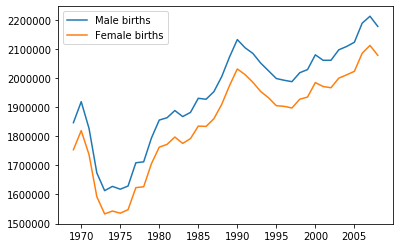

In [88]:
#12d
import matplotlib.pyplot as plt
plt.plot(birth_year["M"], label="Male births")
plt.plot(birth_year["F"], label = "Female births")
plt.legend()

In [90]:
#Q.13
mpg = pd.read_csv("mpg.csv")
mpg.info() # use .info(), not .describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null int64
hwy             234 non-null int64
fl              234 non-null object
class           234 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [91]:
#13b recode "drv"
drv_newgroup ={"drv":{"f":"forward","r":"rear","4":"four wheel"}}
mpg.replace(drv_newgroup, inplace=True)
mpg["drv"].value_counts()

forward       106
four wheel    103
rear           25
Name: drv, dtype: int64

In [92]:
#13c missing values
mpg.isnull().any()

manufacturer    False
model           False
displ           False
year            False
cyl             False
trans           False
drv             False
cty             False
hwy             False
fl              False
class           False
dtype: bool

In [93]:
#13d
mpg.groupby(["class","year"])["hwy"].mean().unstack()

year,1999,2008
class,,
2seater,24.500000,25.000000
compact,27.920000,28.727273
midsize,26.500000,28.047619
minivan,22.500000,22.200000
pickup,16.812500,16.941176
subcompact,29.000000,27.125000
suv,17.551724,18.636364


In [94]:
#13e
mpg.groupby(["class"])["cty"].min()

class
2seater       15
compact       15
midsize       15
minivan       11
pickup         9
subcompact    14
suv            9
Name: cty, dtype: int64

Text(0, 0.5, 'hwy')

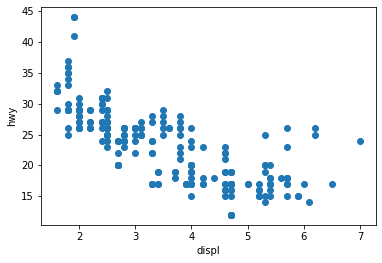

In [95]:
#13f
import matplotlib.pyplot as plt
variables = [mpg["displ"],mpg["hwy"]]
plt.scatter(variables[0], variables[1])
plt.xlabel("displ")
plt.ylabel("hwy")

In [96]:
#13g and h
mpg_reindexed = mpg.set_index("model")
mpg_reindexed.loc["corvette"]

,manufacturer,displ,year,cyl,trans,drv,cty,hwy,fl,class
model,,,,,,,,,,
corvette,chevrolet,5.7,1999,8,manual(m6),rear,16,26,p,2seater
corvette,chevrolet,5.7,1999,8,auto(l4),rear,15,23,p,2seater
corvette,chevrolet,6.2,2008,8,manual(m6),rear,16,26,p,2seater
corvette,chevrolet,6.2,2008,8,auto(s6),rear,15,25,p,2seater
corvette,chevrolet,7.0,2008,8,manual(m6),rear,15,24,p,2seater


In [98]:
#13i
mpg.sort_values(by=["year","manufacturer"], ascending=[True,False])

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
207,volkswagen,gti,2.0,1999,4,manual(m5),forward,21,29,r,compact
208,volkswagen,gti,2.0,1999,4,auto(l4),forward,19,26,r,compact
211,volkswagen,gti,2.8,1999,6,manual(m5),forward,17,24,r,compact
212,volkswagen,jetta,1.9,1999,4,manual(m5),forward,33,44,d,compact
213,volkswagen,jetta,2.0,1999,4,manual(m5),forward,21,29,r,compact
...,...,...,...,...,...,...,...,...,...,...,...
10,audi,a4 quattro,2.0,2008,4,auto(s6),four wheel,19,27,p,compact
13,audi,a4 quattro,3.1,2008,6,auto(s6),four wheel,17,25,p,compact
14,audi,a4 quattro,3.1,2008,6,manual(m6),four wheel,15,25,p,compact
16,audi,a6 quattro,3.1,2008,6,auto(s6),four wheel,17,25,p,midsize


In [99]:
#13j
cols = list(mpg.columns)   # convert the column index into a list
cols.remove("class")       # remove the element "class" from the list
cols.insert(0,"class")     # insert the element "class" as the first element
mpg2 = mpg[cols]
mpg2.head()

,class,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl
0,compact,audi,a4,1.8,1999,4,auto(l5),forward,18,29,p
1,compact,audi,a4,1.8,1999,4,manual(m5),forward,21,29,p
2,compact,audi,a4,2.0,2008,4,manual(m6),forward,20,31,p
3,compact,audi,a4,2.0,2008,4,auto(av),forward,21,30,p
4,compact,audi,a4,2.8,1999,6,auto(l5),forward,16,26,p


In [100]:
#Q.14 (a)
who = pd.read_csv("who.csv")
who.head(20)

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AF,AFG,1985,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AF,AFG,1986,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AF,AFG,1987,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AF,AFG,1988,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AF,AFG,1989,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#Q.14 (b)
who_new = who.drop(["iso2","iso3"], axis=1)
who_new.columns

Index(['country', 'year', 'new_sp_m014', 'new_sp_m1524', 'new_sp_m2534',
       'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65',
       'new_sp_f014', 'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544',
       'new_sp_f4554', 'new_sp_f5564', 'new_sp_f65', 'new_sn_m014',
       'new_sn_m1524', 'new_sn_m2534', 'new_sn_m3544', 'new_sn_m4554',
       'new_sn_m5564', 'new_sn_m65', 'new_sn_f014', 'new_sn_f1524',
       'new_sn_f2534', 'new_sn_f3544', 'new_sn_f4554', 'new_sn_f5564',
       'new_sn_f65', 'new_ep_m014', 'new_ep_m1524', 'new_ep_m2534',
       'new_ep_m3544', 'new_ep_m4554', 'new_ep_m5564', 'new_ep_m65',
       'new_ep_f014', 'new_ep_f1524', 'new_ep_f2534', 'new_ep_f3544',
       'new_ep_f4554', 'new_ep_f5564', 'new_ep_f65', 'newrel_m014',
       'newrel_m1524', 'newrel_m2534', 'newrel_m3544', 'newrel_m4554',
       'newrel_m5564', 'newrel_m65', 'newrel_f014', 'newrel_f1524',
       'newrel_f2534', 'newrel_f3544', 'newrel_f4554', 'newrel_f5564',
       'newrel_f65'],
   

In [102]:
#14c(i)
# convert newrel into new_rel
columns = []
for word in who_new.columns:
    if word[:6] != "newrel":
        columns.append(word)
    elif word[:6] == "newrel":
        word = "new_rel"+ word[6:]
        columns.append(word)
who_new.columns = columns
who_new.columns

Index(['country', 'year', 'new_sp_m014', 'new_sp_m1524', 'new_sp_m2534',
       'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65',
       'new_sp_f014', 'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544',
       'new_sp_f4554', 'new_sp_f5564', 'new_sp_f65', 'new_sn_m014',
       'new_sn_m1524', 'new_sn_m2534', 'new_sn_m3544', 'new_sn_m4554',
       'new_sn_m5564', 'new_sn_m65', 'new_sn_f014', 'new_sn_f1524',
       'new_sn_f2534', 'new_sn_f3544', 'new_sn_f4554', 'new_sn_f5564',
       'new_sn_f65', 'new_ep_m014', 'new_ep_m1524', 'new_ep_m2534',
       'new_ep_m3544', 'new_ep_m4554', 'new_ep_m5564', 'new_ep_m65',
       'new_ep_f014', 'new_ep_f1524', 'new_ep_f2534', 'new_ep_f3544',
       'new_ep_f4554', 'new_ep_f5564', 'new_ep_f65', 'new_rel_m014',
       'new_rel_m1524', 'new_rel_m2534', 'new_rel_m3544', 'new_rel_m4554',
       'new_rel_m5564', 'new_rel_m65', 'new_rel_f014', 'new_rel_f1524',
       'new_rel_f2534', 'new_rel_f3544', 'new_rel_f4554', 'new_rel_f5564',
       'new_

In [103]:
#14c(ii)
sub_columns = ['new_sp_m014', 'new_sp_m1524', 'new_sp_m2534',
       'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65',
       'new_sp_f014', 'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544',
       'new_sp_f4554', 'new_sp_f5564', 'new_sp_f65', 'new_sn_m014',
       'new_sn_m1524', 'new_sn_m2534', 'new_sn_m3544', 'new_sn_m4554',
       'new_sn_m5564', 'new_sn_m65', 'new_sn_f014', 'new_sn_f1524',
       'new_sn_f2534', 'new_sn_f3544', 'new_sn_f4554', 'new_sn_f5564',
       'new_sn_f65', 'new_ep_m014', 'new_ep_m1524', 'new_ep_m2534',
       'new_ep_m3544', 'new_ep_m4554', 'new_ep_m5564', 'new_ep_m65',
       'new_ep_f014', 'new_ep_f1524', 'new_ep_f2534', 'new_ep_f3544',
       'new_ep_f4554', 'new_ep_f5564', 'new_ep_f65', 'new_rel_m014',
       'new_rel_m1524', 'new_rel_m2534', 'new_rel_m3544', 'new_rel_m4554',
       'new_rel_m5564', 'new_rel_m65', 'new_rel_f014', 'new_rel_f1524',
       'new_rel_f2534', 'new_rel_f3544', 'new_rel_f4554', 'new_rel_f5564',
       'new_rel_f65']
who_new2 = pd.melt(who_new, id_vars = ["country","year"],value_vars=sub_columns)
who_new2.columns = ["country","year","key","case"]
who_new2

,country,year,key,case
0,Afghanistan,1980,new_sp_m014,NaN
1,Afghanistan,1981,new_sp_m014,NaN
2,Afghanistan,1982,new_sp_m014,NaN
3,Afghanistan,1983,new_sp_m014,NaN
4,Afghanistan,1984,new_sp_m014,NaN
...,...,...,...,...
405435,Zimbabwe,2009,new_rel_f65,NaN
405436,Zimbabwe,2010,new_rel_f65,NaN
405437,Zimbabwe,2011,new_rel_f65,NaN
405438,Zimbabwe,2012,new_rel_f65,NaN


In [104]:
#14c(iii) drop all missing values of case
who_new2.dropna(subset=["case"],axis=0, inplace=True)

In [105]:
#14c(iv) split each value of the column "key"
who_new2[["new","type","sexage"]] = who_new2["key"].str.split("_", expand=True)
who_new2.head()

,country,year,key,case,new,type,sexage
17,Afghanistan,1997,new_sp_m014,0.0,new,sp,m014
18,Afghanistan,1998,new_sp_m014,30.0,new,sp,m014
19,Afghanistan,1999,new_sp_m014,8.0,new,sp,m014
20,Afghanistan,2000,new_sp_m014,52.0,new,sp,m014
21,Afghanistan,2001,new_sp_m014,129.0,new,sp,m014


In [106]:
#14c(v) split each value of the column "sexage"
gender = []
age = []
for value in who_new2["sexage"]:
    gender.append(value[0])
    age.append(value[1:])
    
who_new2["gender"] = gender
who_new2["age"] = age
who_new2.drop(["key","sexage"],axis=1, inplace=True)
who_new2.head()

,country,year,case,new,type,gender,age
17,Afghanistan,1997,0.0,new,sp,m,014
18,Afghanistan,1998,30.0,new,sp,m,014
19,Afghanistan,1999,8.0,new,sp,m,014
20,Afghanistan,2000,52.0,new,sp,m,014
21,Afghanistan,2001,129.0,new,sp,m,014
